In [1]:
# Imports
import pandas as pd
import numpy as np

from bertopic import BERTopic
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load model 
topic_model = BERTopic.load("BERT_v1")

# Load sample data
transcripts = pd.read_csv('transcripts_sample.csv.gz', compression='gzip')

# Create list of transcripts
docs = list(transcripts['transcript'])

# Get document info
topic_doc = topic_model.get_document_info(docs)

In [4]:
# Filter out outliers
topic_doc_filter = topic_doc[topic_doc['Topic'] != -1]
topic_doc_filter.head()

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,I'm Daniel Williams director of active chicks ...,78,78_med_neurology_patients_residency,med - neurology - patients - residency - medic...,0.846029,False
1,We recording KP now. We are recording guys pro...,6,6_business_product_company_companies,business - product - company - companies - sal...,0.964089,False
2,On March 7th 1895 24 year old Jacob hetsig sat...,3,3_police_his_murder_crime,police - his - murder - crime - her - par - mu...,1.000000,False
3,"Good morning, everybody. It's Sally Kalin here...",25,25_craig_relationship_breakup_kenneth,craig - relationship - breakup - kenneth - ex ...,0.106036,False
5,Yeah. Today we are going to talk about. What S...,2,2_god_jesus_lord_church,god - jesus - lord - church - blessed - pray -...,1.000000,False


In [5]:
# Embedd  documents
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(list(topic_doc_filter.Document), show_progress_bar=True)

Batches: 100%|██████████| 272/272 [15:44<00:00,  3.47s/it]


In [6]:
topic_doc_filter['Embeddings'] = list(embeddings)
topic_doc_filter.head(2)

,Document,Topic,Name,Top_n_words,Probability,Representative_document,Embeddings
0,I'm Daniel Williams director of active chicks ...,78,78_med_neurology_patients_residency,med - neurology - patients - residency - medic...,0.846029,False,"[-0.048803285, -0.059997372, -0.0036902502, 0...."
1,We recording KP now. We are recording guys pro...,6,6_business_product_company_companies,business - product - company - companies - sal...,0.964089,False,"[0.067422755, -0.022583762, -0.019355915, -0.0..."


In [32]:
# Compute cosine similiarity/distance with document embeddings

sim_matrix = cosine_similarity(embeddings)
df_sim = pd.DataFrame(sim_matrix, columns=filtered_docs.index, index=filtered_docs.index)
df_sim

,0,1,2,3,4,5,6,7,8,9,...,362,363,364,365,366,367,368,369,370,371
0,1.000000,0.325963,0.435000,0.801560,0.579946,0.400170,0.439881,0.778909,0.349178,0.394905,...,0.375360,0.074975,0.512340,0.076624,0.645604,0.476304,0.015187,0.381138,0.084565,0.622441
1,0.325963,1.000000,0.222527,0.237422,0.296104,0.285267,0.230775,0.171831,0.118418,0.209681,...,0.388490,0.122732,0.161230,-0.007268,0.233492,0.318151,0.034612,0.238129,0.057116,0.235031
2,0.435000,0.222527,1.000000,0.353952,0.532962,0.358618,0.491175,0.297800,0.407624,0.386104,...,0.280616,0.158567,0.205688,0.197358,0.453097,0.297102,0.139913,0.338537,0.027177,0.315052
3,0.801560,0.237422,0.353952,1.000000,0.565680,0.324068,0.383789,0.781308,0.301149,0.310392,...,0.335415,0.024069,0.445647,0.082821,0.548983,0.433539,0.043995,0.304779,0.074871,0.629597
4,0.579946,0.296104,0.532962,0.565680,1.000000,0.522072,0.572657,0.517597,0.437201,0.422593,...,0.464335,0.177808,0.311586,0.227092,0.650440,0.502568,0.235382,0.399114,0.083400,0.527773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.476304,0.318151,0.297102,0.433539,0.502568,0.396334,0.353951,0.431497,0.305842,0.363402,...,0.511547,0.248596,0.224700,0.044908,0.426623,1.000000,0.118747,0.184538,0.044857,0.333814
368,0.015187,0.034612,0.139913,0.043995,0.235382,0.234381,0.140686,0.044589,0.118343,0.096952,...,0.154135,0.218236,0.028612,0.095556,0.231335,0.118747,1.000000,0.139937,-0.018508,0.043643
369,0.381138,0.238129,0.338537,0.304779,0.399114,0.405735,0.404301,0.290241,0.282914,0.374211,...,0.231758,0.105680,0.302483,0.072165,0.388343,0.184538,0.139937,1.000000,0.170573,0.323585
370,0.084565,0.057116,0.027177,0.074871,0.083400,0.126372,0.059775,0.094851,0.059487,0.208809,...,0.052848,0.040853,0.137243,0.099333,0.153465,0.044857,-0.018508,0.170573,1.000000,0.145142


In [47]:
# Convert cosine distance matrix to pair-wise dataframe
df_tri = pd.DataFrame(np.triu(df_sim), columns=df_sim.columns, index=df_sim.index)
df_long = df_tri.stack().reset_index()

# Rename the columns
df_long.columns = ['Pair_1', 'Pair_2', 'Cosine_Distance']

# Remove rows where Pair_1 is equal to Pair_2
df_long = df_long[df_long['Pair_1'] != df_long['Pair_2']]
df_long = df_long[df_long.Cosine_Distance !=0]

print('Shape:', df_long.shape)

Shape: (69006, 3)


Interpret df_long as an edge_weighted graph. Through that we can determine its diameter by finding the maximum edge weight since it is fully connected. 
diam(G)=max{distG,w(u,v)|u∈V(G),v∈V(G)}.

In [50]:
# Discriptive stats and plot dist
print(f'Max: {df_long.Cosine_Distance.max():.2f}')
print(f'Min: {df_long.Cosine_Distance.min():.2f}')

Max: 0.97
Min: -0.17


In [ ]:
# Get document embeddings for each topic
topic_embeddings = []
for topic_id in unique_topics:
    docs = topic_doc_filter.Document.where('Topic' == topic_id)
    embeddings = topic_model.transform(docs)
    topic_embeddings.append(embeddings)

# Compute cosine similarity matrix for each topic
similarity_matrices = []
for embeddings in topic_embeddings:
    sim_matrix = cosine_similarity(embeddings)
    similarity_matrices.append(sim_matrix)

# Create DataFrame to store similarity matrices
topic_labels = topic_model.get_topic_freq().index
dfs = []
for i, sim_matrix in enumerate(similarity_matrices):
    topic_label = topic_labels[i]
    df = pd.DataFrame(sim_matrix, columns=range(len(topic_model.get_documents(topic_label))),
                      index=range(len(topic_model.get_documents(topic_label))))
    df.columns = [f'{topic_label}_doc_{idx}' for idx in df.columns]
    df.index = [f'{topic_label}_doc_{idx}' for idx in df.index]
    dfs.append(df)

# Combine similarity matrices for all topics
df_cosine_similarities = pd.concat(dfs, axis=0)


### Try standardized method - Silhuette score

In [8]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.pyplot import figure

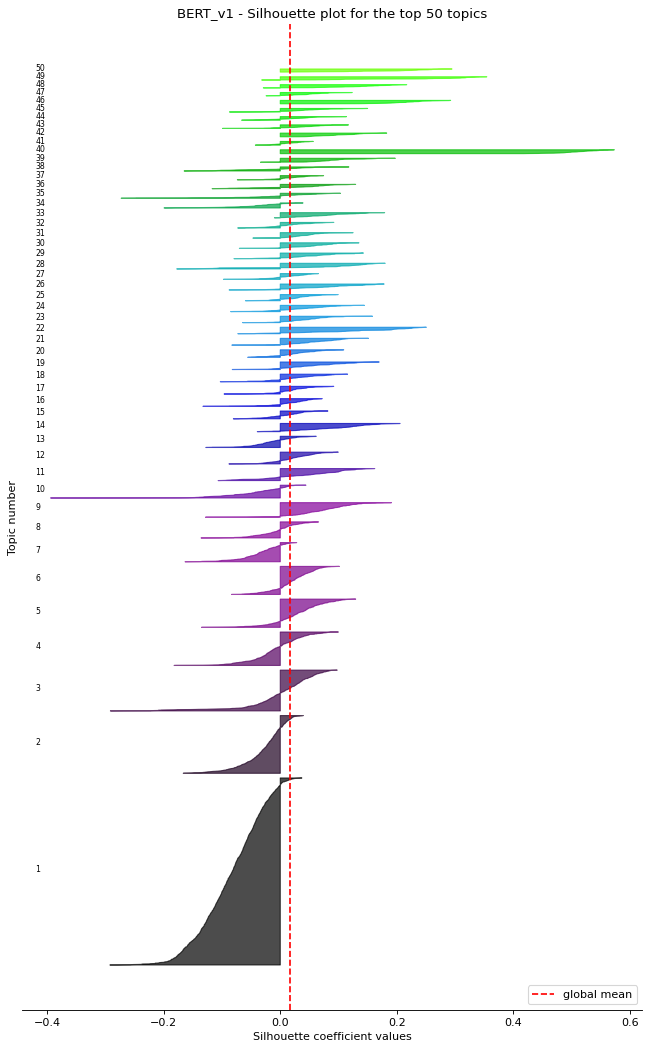

In [47]:
# Plot the silhuette score for the top topic clusters

# Remove borders
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.rcParams.update({'font.size': 10})

figure(figsize=(10, 16), dpi=80)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(embeddings, topic_doc_filter.Topic)
silhouette_avg = np.mean(sample_silhouette_values)


y_lower = 1
for i in range(50):
# Aggregate the silhouette scores for samples belonging to topic i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[topic_doc_filter.Topic == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / topic_doc_filter.Topic)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,)

    # Compute the new y_lower for next plot
    plt.rcParams.update({'font.size': 7})
    plt.text(-0.42, y_lower + 0.5 * size_cluster_i, str(i+1))
    y_lower = y_upper + 50  # adding 50 for separation between topics

plt.rcParams.update({'font.size': 10})
# Label the silhouette plots with their cluster numbers at the middle
plt.title("BERT_v1 - Silhouette plot for the top 50 topics")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Topic number")

# The vertical line for average silhouette score of all the valu=es
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="global mean")
plt.yticks([])  # Clear the yaxis labels / ticks
plt.legend(loc='lower right')
plt.show()

# Take back borders for future plots
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.bottom'] = True